In [23]:
import os
from pathlib import Path

home_dir = str(Path.home())
tdc = os.path.join(home_dir, 'Desktop/python_library_dc/digital-connector-python')
digital_connector = os.path.join(home_dir, 'Desktop/UptodateProject/TomboloDigitalConnector')
os.chdir(tdc)

In [18]:
from recipe import Subject, Dataset, Geo_Match_Rule, Match_Rule, Datasource, GeographicAggregationField, AttributeMatcherField, ConstantField, AttributeMatcher, ListArithmeticField

In [4]:
match_rule_ = Match_Rule(attribute_to_match_on='label', pattern='E0900%')
inner_subject = Subject(subject_type_label='localAuthority', provider_label='uk.gov.ons', 
                       match_rule=match_rule_)
geo_match_ = Geo_Match_Rule(geo_relation='within', subjects=[inner_subject])
main_subject = Subject(subject_type_label='lsoa', provider_label='uk.gov.ons', 
                      geo_match_rule=geo_match_)

In [8]:
oa_class = 'uk.org.tombolo.importer.ons.OaImporter'
osm_class = 'uk.org.tombolo.importer.osm.OSMImporter'
geography_ = 'europe/great-britain/england/greater-london'
lsoa_data = Datasource(importer_class=oa_class, datasource_id='lsoa')
la_data = Datasource(importer_class=oa_class, datasource_id='localAuthority')
osmhealth_data = Datasource(importer_class=osm_class, datasource_id='OSMHealth', 
                            geography_scope=[geography_])
osm_civic_data = Datasource(importer_class=osm_class, datasource_id='OSMCivic', 
                      geography_scope=[geography_])
osm_edu_data = Datasource(importer_class=osm_class, datasource_id='OSMEducation', 
                    geography_scope=[geography_])

In [13]:
constant_field = ConstantField(value='1')
geo_sub = Subject(provider_label='org.openstreetmap', subject_type_label='OSMEntity')

attr_matcher = AttributeMatcher(provider='org.openstreetmap', label='amenity', 
                               values=['clinic', 'dentist', 'doctors', 'hospital', 'pharmacy'])
attr_matcher_field = AttributeMatcherField(attributes=[attr_matcher], field=constant_field, 
                                          label='amenity')
geo_agg_field = GeographicAggregationField(subject=geo_sub, function='sum', 
                                           field=attr_matcher_field, label='Health Count')

In [14]:
attr_matcher_2 = AttributeMatcher(provider='org.openstreetmap', label='amenity', 
                               values=['school', 'library', 'university', 'college', 'kindergarten'])
attr_matcher_field_2 = AttributeMatcherField(attributes=[attr_matcher_2], field=constant_field, 
                                          label='amenity')
geo_agg_field_2 = GeographicAggregationField(subject=geo_sub, function='sum', 
                                           field=attr_matcher_field_2, label='Education Count')

In [16]:
attr_matcher_3 = AttributeMatcher(provider='org.openstreetmap', label='amenity', 
                               values=['courthouse', 'coworking_space', 'recycling', 'fire_station', 'place_of_worship', 'police', 'post_office', 'town_hall', 'waste_disposal'])
attr_matcher_field_3 = AttributeMatcherField(attributes=[attr_matcher_3], field=constant_field, 
                                          label='amenity')
geo_agg_field_3 = GeographicAggregationField(subject=geo_sub, function='sum', 
                                           field=attr_matcher_field_3, label='Civic Count')

In [19]:
arthmetic_field = ListArithmeticField(operation='add', 
                                      fields=[geo_agg_field, geo_agg_field_2, geo_agg_field_3], 
                                     label='Sum of civic amenities')

In [21]:
dataset = Dataset(subjects=[main_subject], 
                  datasources=[lsoa_data, la_data, osmhealth_data, osm_edu_data, osm_civic_data], 
                 fields=[geo_agg_field, geo_agg_field_2, geo_agg_field_3, arthmetic_field])

In [29]:
dataset.build_and_run(tombolo_path=digital_connector, model_output_location=home_dir + '/london-social-infra.json', 
                     recipe_console_print=False, model_output_console_print=False)

Execution completed Successfully!!!!


In [30]:
import geopandas as gpd

In [33]:
merged_data = gpd.read_file(home_dir + '/london-social-infra.json')
merged_data.head()

,Civic Count,Sum of civic amenities,name,Health Count,label,Education Count,geometry
0,3.0,3.0,City of London 001A,0.0,E01000001,0.0,"POLYGON ((-0.0973 51.5216, -0.0965 51.5203, -0..."
1,2.0,7.0,City of London 001B,1.0,E01000002,4.0,"POLYGON ((-0.0881 51.5194, -0.0893 51.5175, -0..."
2,1.0,2.0,City of London 001C,1.0,E01000003,0.0,"POLYGON ((-0.0968 51.5233, -0.0964 51.5228, -0..."
3,5.0,10.0,City of London 001E,3.0,E01000005,2.0,"POLYGON ((-0.0732 51.51, -0.0755 51.5097, -0.0..."
4,0.0,0.0,Barking and Dagenham 016A,0.0,E01000006,0.0,"POLYGON ((0.0912 51.5391, 0.09329999999999999 ..."


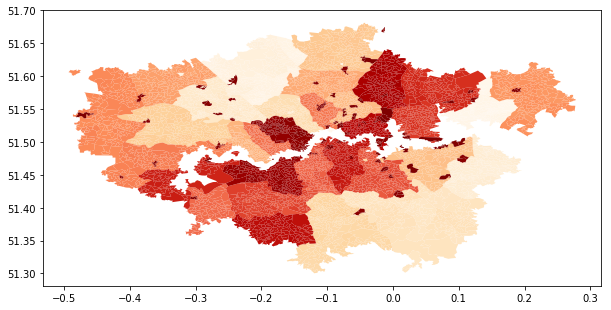

In [42]:
import matplotlib.pyplot as plt
merged_data.plot(cmap='OrRd', figsize=(10,8))

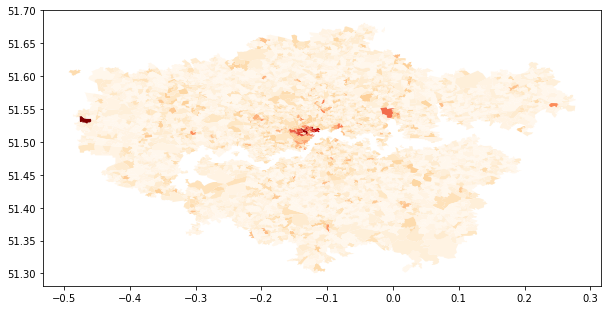

In [41]:
merged_data.plot(column='Sum of civic amenities', cmap='OrRd', figsize=(10,8))